# Boom BiKe Assignment
## Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the days dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #data visualization

In [2]:
# Load dataset
file_path = 'day.csv'
bike_data = pd.read_csv(file_path)
#printing the data (first 5 rows)
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Check the shape of df
print(bike_data.shape)

(730, 16)


## Step 2: Preprocessing Steps

In [5]:
# Drop unnecessary columns
bike_data = bike_data.drop(['instant','dteday','casual', 'registered'], axis=1)
#bike_data.head()

In [6]:
# Creae the dummy variables for all categorical valurables One-hot encoding for categorical variables
bike_data = pd.get_dummies(bike_data, drop_first=True)
bike_data=bike_data.astype(int)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14,18,80,10,985
1,1,0,1,0,0,0,2,14,17,69,16,801
2,1,0,1,0,1,1,1,8,9,43,16,1349
3,1,0,1,0,2,1,1,8,10,59,10,1562
4,1,0,1,0,3,1,1,9,11,43,12,1600


## Step 3: EDA

In [7]:
# Few Basic information about the Bike data

## Number of rows
print('Number of Columns:',bike_data.shape[1])
# Number of columns
print('Number of Rows:',bike_data.shape[0])
## Number of missing values
print('Number of missing values:',bike_data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',bike_data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',bike_data.duplicated().sum())

Number of Columns: 12
Number of Rows: 730
Number of missing values: 0
Number of unique values: 901
Number of duplicates: 0


In [8]:
# Basic infomation about the dataframe
print(bike_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   season      730 non-null    int32
 1   yr          730 non-null    int32
 2   mnth        730 non-null    int32
 3   holiday     730 non-null    int32
 4   weekday     730 non-null    int32
 5   workingday  730 non-null    int32
 6   weathersit  730 non-null    int32
 7   temp        730 non-null    int32
 8   atemp       730 non-null    int32
 9   hum         730 non-null    int32
 10  windspeed   730 non-null    int32
 11  cnt         730 non-null    int32
dtypes: int32(12)
memory usage: 34.3 KB
None


In [9]:
# Describing the data
print(bike_data.describe())

           season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  730.000000  730.000000  730.000000  730.000000  730.000000   730.000000  
mean     1.394521   19.809589   23.216438   62.289041   12.263014  4508.006849  
std      0.544807    7.5073

In [10]:
import matplotlib.pyplot as plt #plotting
import plotly.express as px #plotting

### Univariate analysis

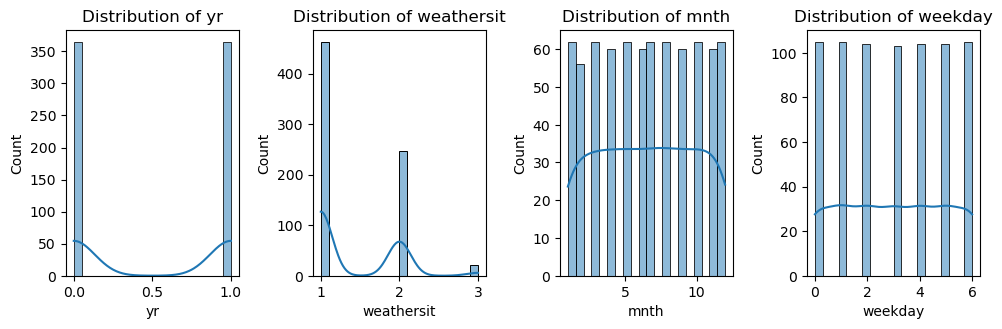

In [11]:
# Set the size for the plots
plt.figure(figsize=(10, 6))
Univariate_features=['yr','weathersit','mnth','weekday']
# Plot histograms for each numerical feature
for i, feature in enumerate(Univariate_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(bike_data[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

# Show the histograms
plt.show()


#### Inference of Univariate Analysis: 
1. Number of bike count in 2018 and 2019 is same
2. Bike count is increased in the month of clear weather situation
3. Bike count increased from 2nd month of year i.e February, then count remain the same till 10th month of year i.e October and then decreases in the last part of year
4. Less bike count in the weekend and on holiday

In [12]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14,18,80,10,985
1,1,0,1,0,0,0,2,14,17,69,16,801
2,1,0,1,0,1,1,1,8,9,43,16,1349
3,1,0,1,0,2,1,1,8,10,59,10,1562
4,1,0,1,0,3,1,1,9,11,43,12,1600


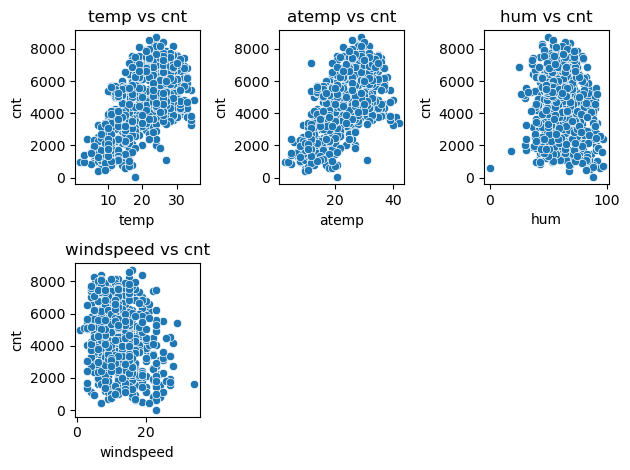

In [13]:
# Bivariate Analysis - Scatter plots for relationships between 'cnt' and other features
bivariate_features = ['temp', 'atemp', 'hum', 'windspeed']

# Plot scatter plots for each pair (cnt vs bivariate features)
for i, feature in enumerate(bivariate_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=bike_data[feature], y=bike_data['cnt'])
    plt.title(f'{feature} vs cnt')
    plt.tight_layout()

# Show the scatter plots
plt.show()

In [14]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14,18,80,10,985
1,1,0,1,0,0,0,2,14,17,69,16,801
2,1,0,1,0,1,1,1,8,9,43,16,1349
3,1,0,1,0,2,1,1,8,10,59,10,1562
4,1,0,1,0,3,1,1,9,11,43,12,1600


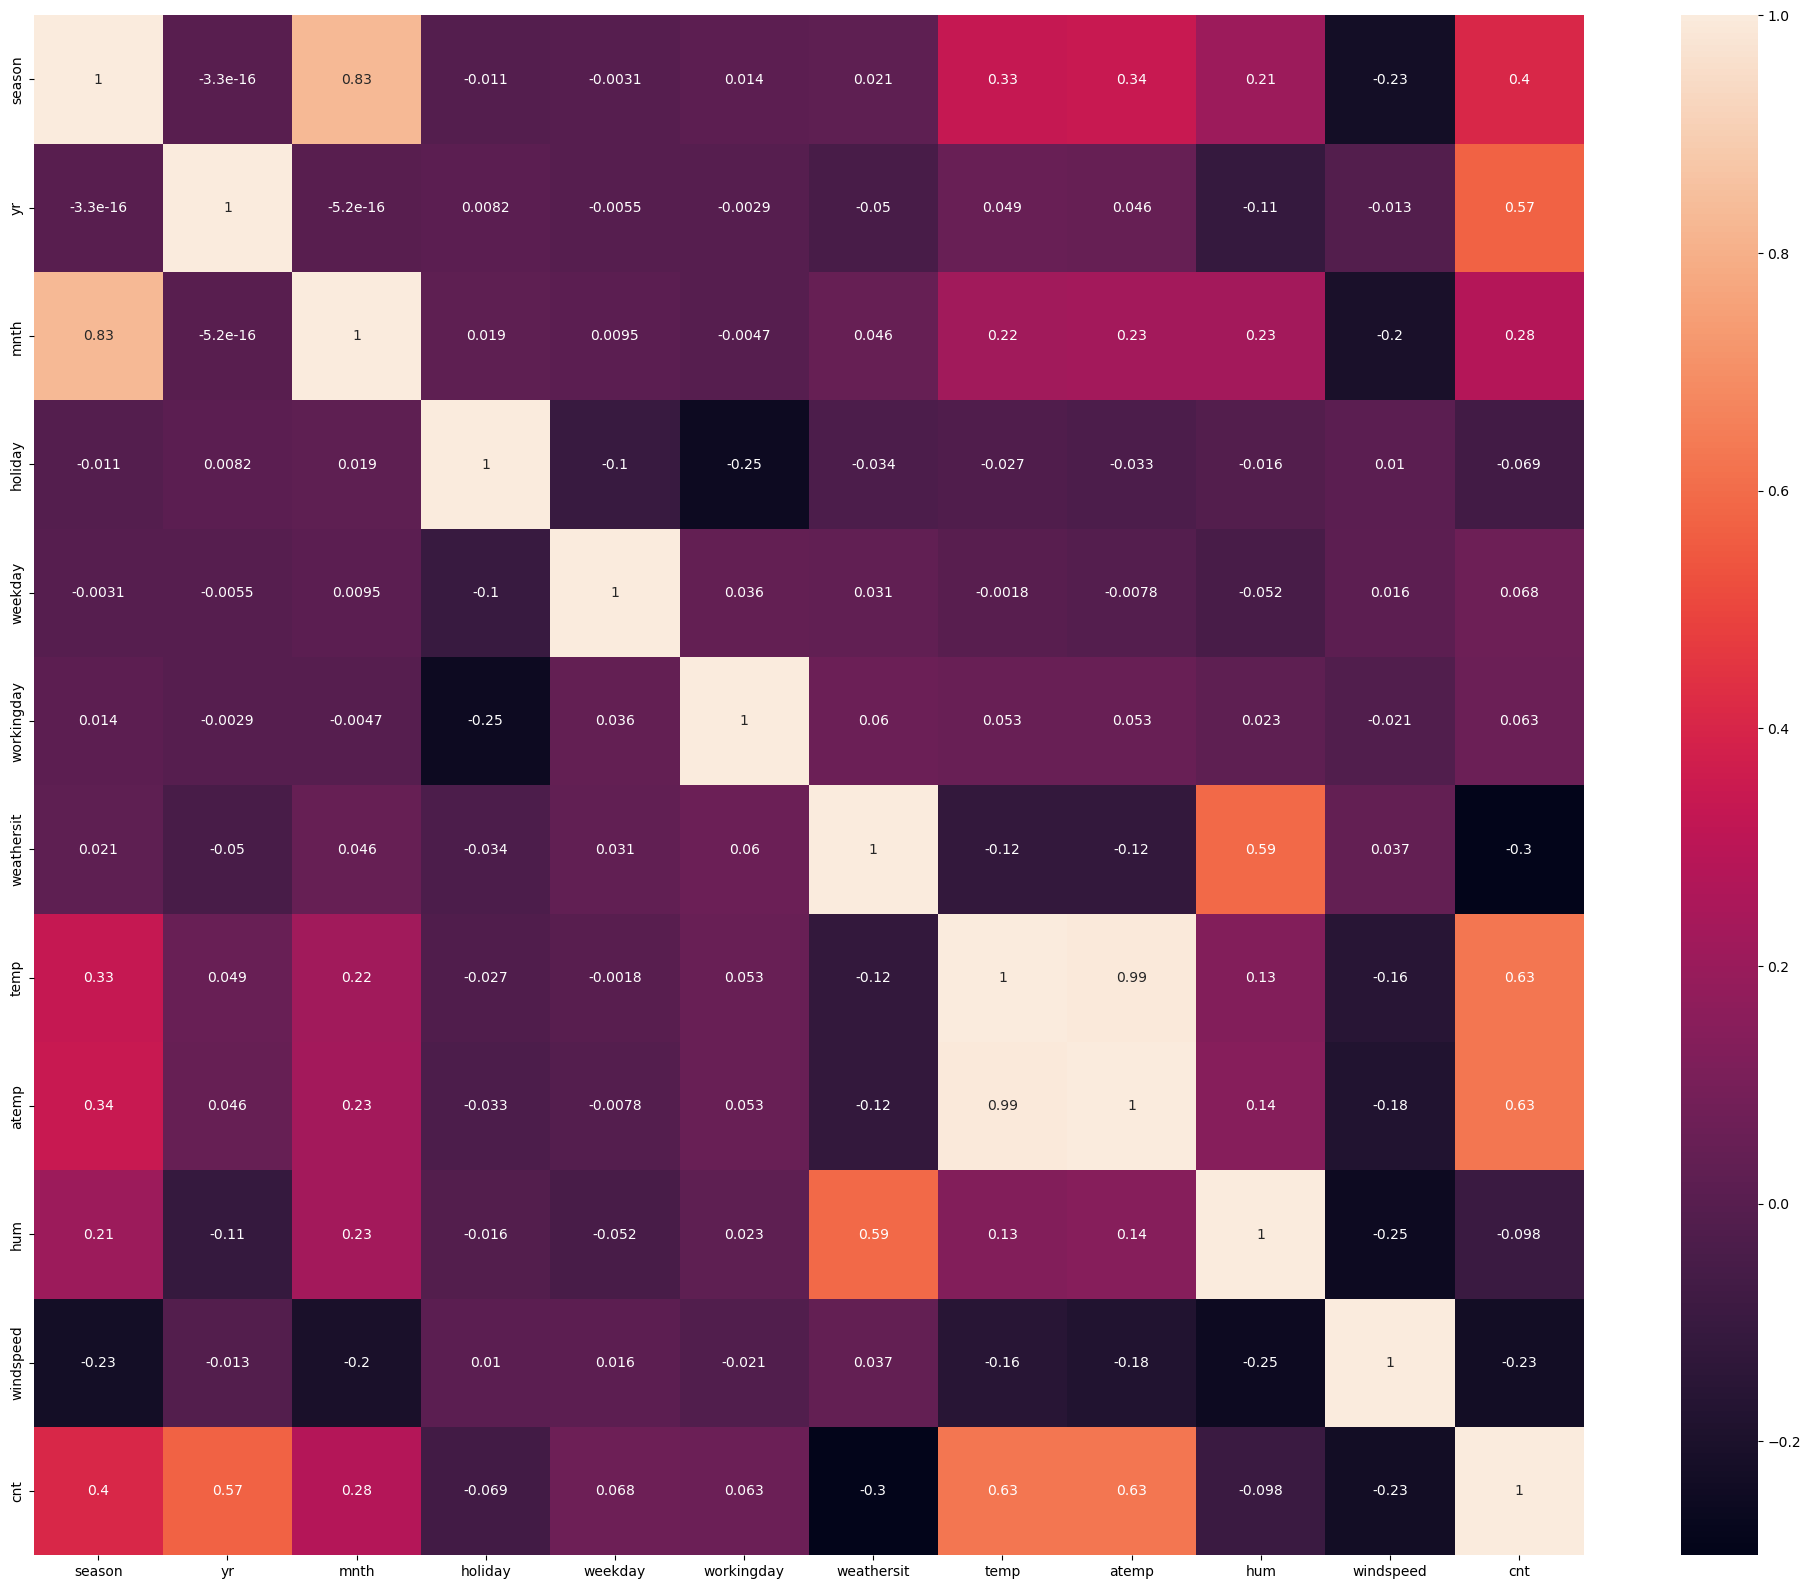

In [15]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_data.corr(), annot = True)
plt.show()

#### Inference of Bivariate Analysis: 
1. Both temp temperature and feeling temperature shows positive bike count with increased values.
2. With the humidity, bike rental count have negative relation ship. Means increased in humidity decrease the bike count
3. Windspeed no correlationship with bike rental count.

In [16]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14,18,80,10,985
1,1,0,1,0,0,0,2,14,17,69,16,801
2,1,0,1,0,1,1,1,8,9,43,16,1349
3,1,0,1,0,2,1,1,8,10,59,10,1562
4,1,0,1,0,3,1,1,9,11,43,12,1600


## Step 3: Train Test Split :-

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [18]:
# Split the dataset into training and testing sets
df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   season      510 non-null    int32
 1   yr          510 non-null    int32
 2   mnth        510 non-null    int32
 3   holiday     510 non-null    int32
 4   weekday     510 non-null    int32
 5   workingday  510 non-null    int32
 6   weathersit  510 non-null    int32
 7   temp        510 non-null    int32
 8   atemp       510 non-null    int32
 9   hum         510 non-null    int32
 10  windspeed   510 non-null    int32
 11  cnt         510 non-null    int32
dtypes: int32(12)
memory usage: 27.9 KB


In [20]:
df_train.shape

(510, 12)

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   season      219 non-null    int32
 1   yr          219 non-null    int32
 2   mnth        219 non-null    int32
 3   holiday     219 non-null    int32
 4   weekday     219 non-null    int32
 5   workingday  219 non-null    int32
 6   weathersit  219 non-null    int32
 7   temp        219 non-null    int32
 8   atemp       219 non-null    int32
 9   hum         219 non-null    int32
 10  windspeed   219 non-null    int32
 11  cnt         219 non-null    int32
dtypes: int32(12)
memory usage: 12.0 KB


In [22]:
df_test.shape

(219, 12)

In [23]:
df_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### ReScaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [25]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
653,4,1,10,0,2,1,1,0.515152,0.512821,0.567010,0.31250,0.864243
576,3,1,7,0,2,1,1,0.818182,0.769231,0.721649,0.28125,0.827658
426,1,1,3,0,6,0,2,0.424242,0.435897,0.639175,0.25000,0.465255
728,1,1,12,0,0,0,1,0.242424,0.205128,0.494845,0.65625,0.204096
482,2,1,4,0,6,0,2,0.393939,0.384615,0.494845,0.18750,0.482973


### Dividing into X and Y sets for the model building

In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Recursive feature elimination (RFE)

In [27]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [28]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)         
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', False, 4),
 ('yr', True, 1),
 ('mnth', False, 7),
 ('holiday', False, 2),
 ('weekday', False, 6),
 ('workingday', False, 5),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 3),
 ('windspeed', True, 1)]

In [30]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'weathersit', 'temp', 'atemp', 'windspeed'], dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'hum'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [32]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int32  
 1   weathersit  510 non-null    int32  
 2   temp        510 non-null    float64
 3   atemp       510 non-null    float64
 4   windspeed   510 non-null    float64
dtypes: float64(3), int32(2)
memory usage: 19.9 KB


#### Model 1

In [33]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,290.27
2,temp,282.53
1,weathersit,4.94
4,windspeed,3.63
0,yr,1.99


In [34]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [35]:
# Check the parameters obtained

lr1.params

const         0.276407
yr            0.234513
weathersit   -0.085116
temp          0.231545
atemp         0.338264
windspeed    -0.183624
dtype: float64

In [36]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     311.9
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.07e-151
Time:                        23:17:00   Log-Likelihood:                 397.96
No. Observations:                 510   AIC:                            -783.9
Df Residuals:                     504   BIC:                            -758.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2764      0.024     11.642      0.0

#### Removing the variable 'atemp' based on its High p-value & High VIF

In [37]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [38]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,weathersit,4.76
2,temp,4.14
3,windspeed,3.62
0,yr,1.99


In [39]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
# Check the parameters obtained

lr2.params

const         0.291372
yr            0.233967
weathersit   -0.085723
temp          0.538202
windspeed    -0.196605
dtype: float64

In [40]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     386.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.76e-152
Time:                        23:17:00   Log-Likelihood:                 395.70
No. Observations:                 510   AIC:                            -781.4
Df Residuals:                     505   BIC:                            -760.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2914      0.023     12.809      0.0

##### Residual Analysis Of Training Data

In [41]:
y_train_pred = lr2.predict(X_train_lm2)

C:\Users\heman\AppData\Local\Temp\ipykernel_8484\3333711255.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((res), bins = 20)


Text(0.5, 0, 'Errors')

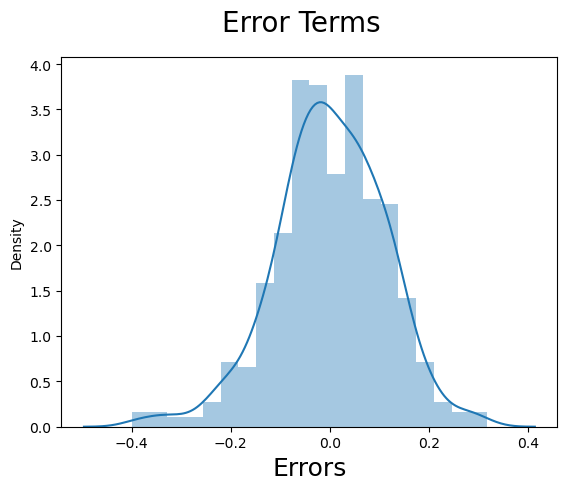

In [42]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Insights 
From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid

MAKING PREDICTION USING FINAL MODEL¶ Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr4)

#### Applying the scaling on the test sets

In [43]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [44]:
df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
184,3,0,7,1,1,0,2,0.818182,0.769231,0.649485,0.09375,0.692706
535,2,1,6,0,3,1,1,0.909091,0.846154,0.608247,0.15625,0.712034
299,4,0,10,0,4,1,2,0.515152,0.487179,0.835052,0.34375,0.303382
221,3,0,8,0,3,1,1,0.878788,0.794872,0.432990,0.34375,0.547400
152,2,0,6,0,4,1,1,0.818182,0.743590,0.309278,0.53125,0.569029


In [45]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2.456621,0.479452,6.474886,0.036530,3.018265,0.698630,1.374429,0.554033,0.532725,0.633950,0.315639,0.520592
std,1.109463,0.500722,3.421875,0.188034,1.988415,0.459904,0.538843,0.233272,0.213047,0.148943,0.155269,0.218435
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.030303,0.025641,0.257732,-0.031250,0.048205
25%,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.363636,0.358974,0.520619,0.218750,0.377531
50%,2.000000,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.545455,0.538462,0.618557,0.312500,0.524275
75%,3.000000,1.000000,9.000000,0.000000,5.000000,1.000000,2.000000,0.757576,0.717949,0.742268,0.406250,0.672745
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.969697,0.974359,1.000000,0.781250,0.963300


#### Dividing into X_test and y_test¶

In [46]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      219 non-null    int32  
 1   yr          219 non-null    int32  
 2   mnth        219 non-null    int32  
 3   holiday     219 non-null    int32  
 4   weekday     219 non-null    int32  
 5   workingday  219 non-null    int32  
 6   weathersit  219 non-null    int32  
 7   temp        219 non-null    float64
 8   atemp       219 non-null    float64
 9   hum         219 non-null    float64
 10  windspeed   219 non-null    float64
dtypes: float64(4), int32(7)
memory usage: 14.5 KB


In [47]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
col1
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm2 = sm.add_constant(X_test)
X_test_lm2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   yr          219 non-null    int32  
 2   weathersit  219 non-null    int32  
 3   temp        219 non-null    float64
 4   windspeed   219 non-null    float64
dtypes: float64(3), int32(2)
memory usage: 8.6 KB


In [48]:
# Making predictions using the final model (lr6)

y_pred = lr2.predict(X_test_lm2)

#### MODEL EVALUATION

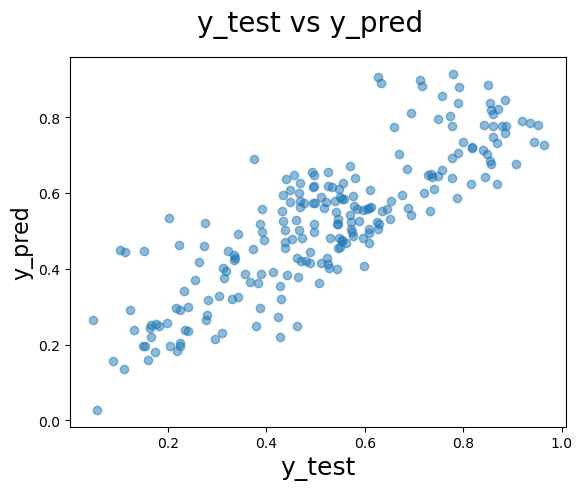

In [49]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#### R^2 Value for TEST¶

In [53]:
from sklearn.metrics import r2_score
r2 =r2_score(y_test, y_pred)

In [54]:
# Calculate Adjusted R²
n = len(y_test)  # Number of data points in the test set
p = X_test.shape[1]  # Number of features (predictors) in the model
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

#### Final Result Comparison¶

In [56]:
print(f"R²: {r2}")
print(f"Adjusted R²: {adjusted_r2}")

R²: 0.7073132665099933
Adjusted R²: 0.7018424864447594


#### FINAL REPORT¶

As per our final Model, the top 3 predictor variables that influences the bike booking are:

Temperature (temp) - A coefficient value of ‘0.5382 ’ indicated that a unit increase in temp variable increases rental bike count by 0.5683 units. Weather Situation 3 (weathersit_3) - A coefficient value of -0.0857’ indicated that,  A coefficient value of ‘0.2345’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2345 units.